In [1]:
# Logistic regression for breast cancer

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [2]:
# Carga el conjunto de datos Breast Cancer
dataset = load_breast_cancer()
X = dataset.data # 569x30
y = dataset.target # 569x1

In [3]:
# Divide el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Normaliza los datos para que todas las características tengan una escala similar
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Crea y entrena el modelo de regresión logistica
model = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=100)
model.fit(X_train, y_train)

/home/walmache/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='auto')

In [6]:
# Imprime los coeficientes y el intercepto del modelo entrenado
print("\nCoeficientes del modelo:")
print(model.coef_)
print("\nIntercepto del modelo:")
print(model.intercept_)


Coeficientes del modelo:
[[-0.43190368 -0.38732553 -0.39343248 -0.46521006 -0.07166728  0.54016395
  -0.8014581  -1.11980408  0.23611852  0.07592093 -1.26817815  0.18887738
  -0.61058302 -0.9071857  -0.31330675  0.68249145  0.17527452 -0.3112999
   0.50042502  0.61622993 -0.87984024 -1.35060559 -0.58945273 -0.84184594
  -0.54416967  0.01611019 -0.94305313 -0.77821726 -1.20820031 -0.15741387]]

Intercepto del modelo:
[0.44558453]


In [7]:
# Realiza predicciones usando el conjunto de prueba
y_pred = model.predict(X_test)

In [8]:
# Convierte las probabilidades en etiquetas binarias (0 o 1)
y_pred = (y_pred > 0.5)

In [9]:
# Muestra el informe de evaluación del modelo entrenado
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [10]:
# Matriz de confusión:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

confusion matrix: 
 [[41  2]
 [ 1 70]]


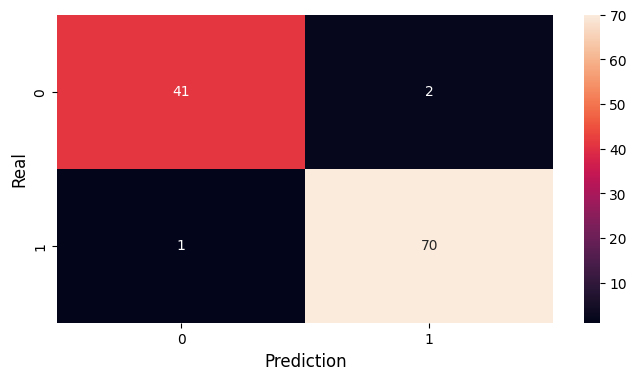

In [11]:
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix: \n", cm)
# gráfica cm
plt.figure(figsize = (8,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction', fontsize = 12)
plt.ylabel('Real', fontsize = 12)
plt.show()

In [12]:
# Exactitud:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print("accuracy: ", acc)

accuracy:  0.9736842105263158


In [13]:
# Sensibilidad:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print("recall: ", recall)

recall:  0.9859154929577465


In [14]:
# Precisión:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print("precision: ", precision)

precision:  0.9722222222222222


In [15]:
# Especificidad
# 'specificity' is just a special case of 'recall'. 
# specificity is the recall of the negative class
specificity = recall_score(y_test, y_pred, pos_label=0)
print("specificity: ", specificity)

specificity:  0.9534883720930233


In [16]:
# Puntuación F1:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("f1 score: ", f1)


f1 score:  0.9790209790209791


In [17]:
# Área bajo la curva:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print("auc: ", auc)

auc:  0.969701932525385


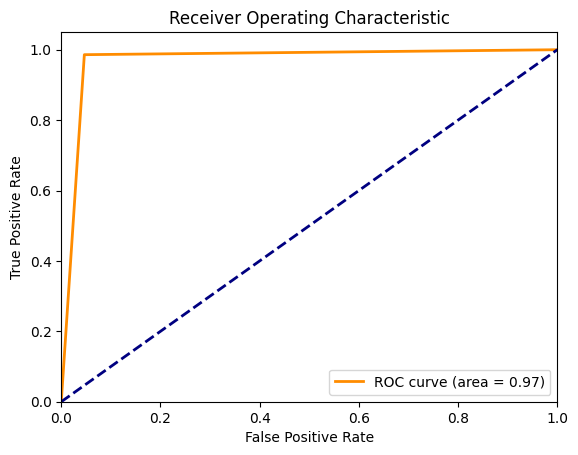

In [18]:
# Curva ROC
from sklearn.metrics import roc_curve
plt.figure()
lw = 2
plt.plot(roc_curve(y_test, y_pred)[0], roc_curve(y_test, y_pred)[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' %auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [19]:
# R Score (R^2 coefficient of determination)
from sklearn.metrics import r2_score
R = r2_score(y_test, y_pred)
print("R2: ", R)

R2:  0.8879790370127744


In [21]:
# Guardar el modelo a un archivo
import joblib
joblib.dump(model, 'logistic_regression_model.pkl')
# Cargar el modelo desde el archivo
loaded_model = joblib.load('logistic_regression_model.pkl')
# Hacer predicciones con el modelo cargado
y_pred = model.predict(X_test)